In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

## Data Cleaning and Visualization

In [2]:
review_data = pd.read_csv("iphone13_reviews.csv")

In [3]:
review_data.head()

,product,title,rating,body
0,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nAwesome,5.0,‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ...
1,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nAbout the Product,5.0,Its was my long dream to buy an iphone and my ...
2,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nApple is the king undoubte...,5.0,"Many people says “oh I don’t like iPhones, and..."
3,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nCamera quality,5.0,Image quality is awesome. All the camera lover...
4,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nABSOLUTELY 10/10,5.0,DISPLAY IS 10/10 PEAK BRIGHTNESS IS CRAZYBATTE...


In [6]:
review_data.isnull().sum()

product     0
title       0
rating      0
body       20
dtype: int64

In [12]:
review_data = review_data.dropna()
review_data.reset_index(inplace = True, drop = True)

In [13]:
review_data.shape

(429, 4)

In [14]:
dff = review_data
dff = dff.rename(columns = {"body" : "review"})
dff['review_type'] = dff['rating'].apply(lambda x: "good" if x > 3 else "bad")

In [15]:
dff.head()

,product,title,rating,review,review_type
0,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nAwesome,5.0,‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ...,good
1,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nAbout the Product,5.0,Its was my long dream to buy an iphone and my ...,good
2,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nApple is the king undoubte...,5.0,"Many people says “oh I don’t like iPhones, and...",good
3,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nCamera quality,5.0,Image quality is awesome. All the camera lover...,good
4,Apple iPhone 13 (128GB) - Starlight,5.0 out of 5 stars\nABSOLUTELY 10/10,5.0,DISPLAY IS 10/10 PEAK BRIGHTNESS IS CRAZYBATTE...,good


In [16]:
review_df = dff[["review","review_type"]]
review_df.head()

,review,review_type
0,‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ...,good
1,Its was my long dream to buy an iphone and my ...,good
2,"Many people says “oh I don’t like iPhones, and...",good
3,Image quality is awesome. All the camera lover...,good
4,DISPLAY IS 10/10 PEAK BRIGHTNESS IS CRAZYBATTE...,good


__Visualization__

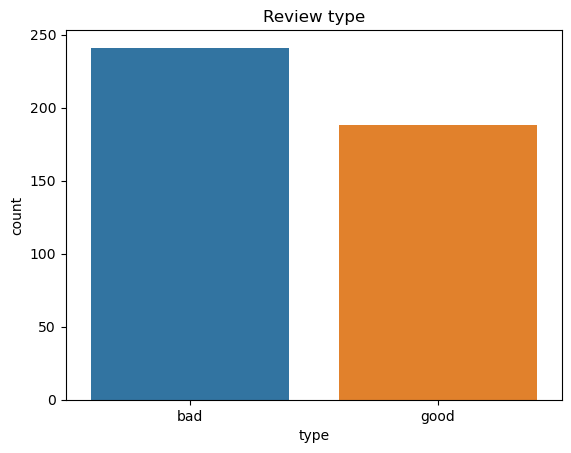

In [17]:
#Total number of good and bad reviews
sns.countplot(x='review_type',
  data=review_df,
  order=review_df.review_type.value_counts().index)

plt.xlabel("type")
plt.title("Review type")
plt.show()

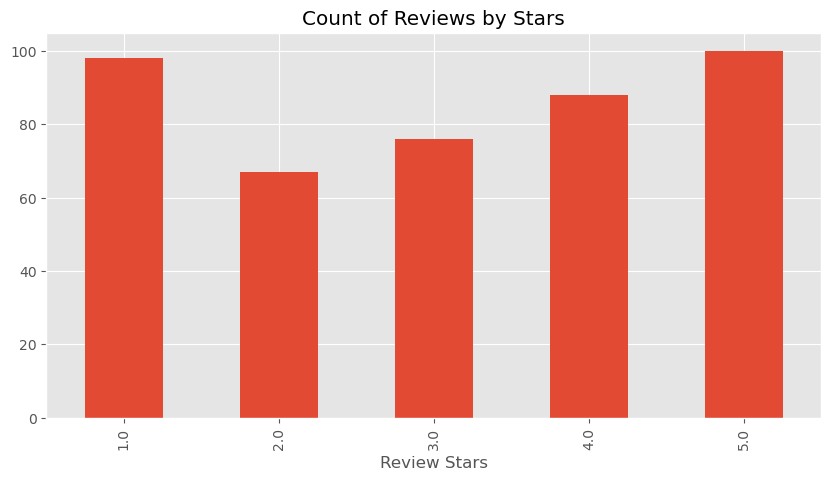

In [29]:
# bar plot based on stars
ax = dff['rating'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [18]:
good_reviews = review_df[review_df.review_type == "good"]
bad_reviews = review_df[review_df.review_type == "bad"]
print(good_reviews.shape, bad_reviews.shape)

(188, 2) (241, 2)


In [20]:
# wordcloud for reviews in bad and good reviews
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
good_reviews_text = " ".join(good_reviews.review.to_numpy().tolist())
bad_reviews_text = " ".join(bad_reviews.review.to_numpy().tolist())

good_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(good_reviews_text)
bad_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(bad_reviews_text)

In [21]:
def show_word_cloud(cloud, title): 
    plt.figure(figsize = (16, 10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show();

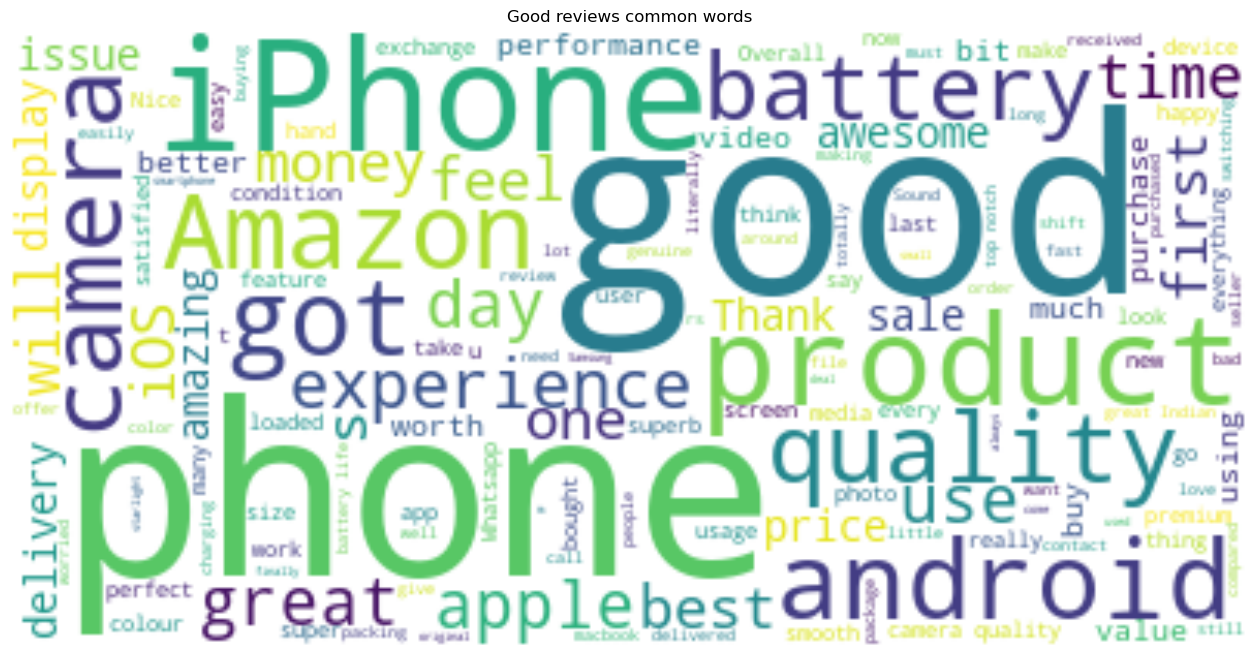

In [22]:
show_word_cloud(good_reviews_cloud, "Good reviews common words")

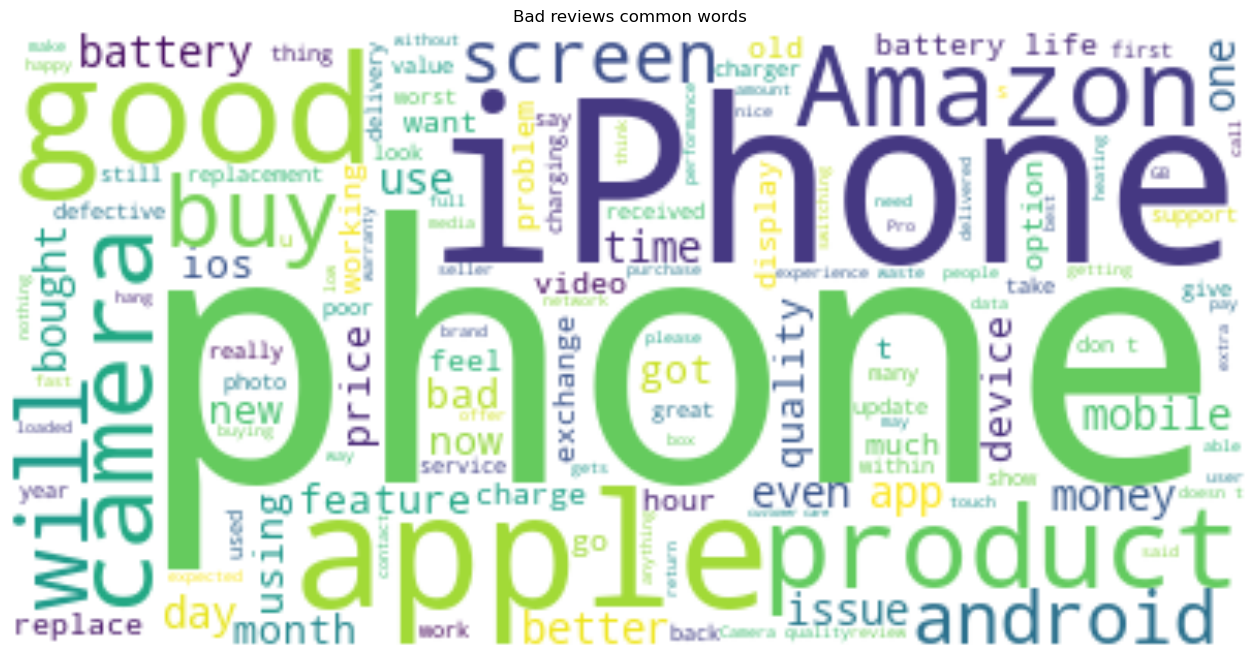

In [23]:
show_word_cloud(bad_reviews_cloud, "Bad reviews common words")

we can see some of the common words in bad reviews like charger,price, battery life etc

## Basic NLTK

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [41]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [44]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [46]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [36]:
example = dff['review'][300]
print(example)

People warned me not buy electronics online. Should have listened.I've been an iPhone user since iPhone 3G. Always purchased at store. This one started showing little kinks right off the bat.The quality doesn't feel same as my other Apple products.


In [39]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['People',
 'warned',
 'me',
 'not',
 'buy',
 'electronics',
 'online',
 '.',
 'Should',
 'have']

In [42]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('People', 'NNS'),
 ('warned', 'VBD'),
 ('me', 'PRP'),
 ('not', 'RB'),
 ('buy', 'VB'),
 ('electronics', 'NNS'),
 ('online', 'VBP'),
 ('.', '.'),
 ('Should', 'MD'),
 ('have', 'VB')]

The second part of the tupples are tags for the words, the meaning of those words can be seen in nltk library.

In [47]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()
#pprint is prety print

(S
  People/NNS
  warned/VBD
  me/PRP
  not/RB
  buy/VB
  electronics/NNS
  online/VBP
  ./.
  Should/MD
  have/VB
  listened.I/VBN
  've/VBP
  been/VBN
  an/DT
  (ORGANIZATION iPhone/NN)
  user/NN
  since/IN
  (ORGANIZATION iPhone/NN 3G/CD)
  ./.
  Always/NNS
  purchased/VBN
  at/IN
  store/NN
  ./.
  This/DT
  one/CD
  started/VBD
  showing/VBG
  little/JJ
  kinks/NNS
  right/VBD
  off/RP
  the/DT
  bat.The/NN
  quality/NN
  does/VBZ
  n't/RB
  feel/VB
  same/JJ
  as/IN
  my/PRP$
  other/JJ
  Apple/NNP
  products/NNS
  ./.)


In [48]:
#save the dff 
dff.to_csv('iphone13_clean_csv', index=False)